In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
pd.options.display.max_rows=10

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df_train=pd.read_csv('../input/train.csv',nrows=100000)

In [3]:
df_train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
99995,2013-09-24 07:39:00.00000071,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5
99996,2014-05-15 12:15:45.0000001,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1
99997,2015-02-19 17:40:43.0000001,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1
99998,2009-10-10 23:35:00.000000165,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4


In [4]:
df_train=df_train[(df_train.pickup_latitude>39)&(df_train.pickup_latitude<42)&(df_train.pickup_longitude>-74.5)&(df_train.pickup_longitude<-72)
                 &(df_train.dropoff_latitude>39)&(df_train.dropoff_latitude<42)&(df_train.dropoff_longitude>-74.5)&(df_train.dropoff_longitude<-72)
                 &(df_train.fare_amount > 0)]

In [5]:
df_train['passenger_count'].value_counts()

1    68108
2    14287
5     6876
3     4211
4     2042
6     2003
0      358
Name: passenger_count, dtype: int64

In [6]:
df_train.loc[df_train['passenger_count']==0,['passenger_count','fare_amount']]

,passenger_count,fare_amount
314,0,34.0
566,0,4.9
678,0,6.5
1160,0,13.3
1935,0,10.1
...,...,...
98235,0,4.9
98464,0,5.7
98645,0,12.9
98862,0,7.7


In [7]:
test_passenger=[]
for i in range(7):
    test_passenger.append(df_train.loc[df_train['passenger_count']==i,['passenger_count','fare_amount']].mean().tolist())

test_passenger=np.asarray(test_passenger)

In [8]:
test_passenger

array([[ 0.        ,  9.16871508],
       [ 1.        , 11.20658014],
       [ 2.        , 11.87429411],
       [ 3.        , 11.38190691],
       [ 4.        , 11.74747796],
       [ 5.        , 11.28611838],
       [ 6.        , 12.35310035]])

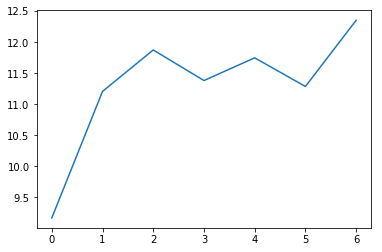

In [9]:
plt.plot(test_passenger[0:,0],test_passenger[0:,1]) # it shows that other than pasnumber=0 or 6,
#there isn't a significant impact on fare, but better to build separate models for each?

In [10]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    df['abs_dist_travel'] = df.abs_diff_longitude + df.abs_diff_latitude

add_travel_vector_features(df_train)

/home/garyh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/garyh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/garyh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [11]:
up_lat_mean=df_train.pickup_latitude.mean();up_lat_mean
up_long_mean=df_train.pickup_longitude.mean();up_long_mean
off_lat_mean=df_train.dropoff_latitude.mean();off_lat_mean
off_long_mean=df_train.dropoff_longitude.mean();off_long_mean

-73.9739196672352

In [12]:
def add_loc_bias_feature(df):
    lat_mean=40.75
    long_mean=-73.97
    df_train['up_diff_center'] = np.sqrt((df_train.pickup_latitude-lat_mean)**2 + (df_train.pickup_longitude-long_mean)**2)
    df_train['off_diff_center'] = np.sqrt((df_train.dropoff_latitude-lat_mean)**2 + (df_train.dropoff_longitude-long_mean)**2)

add_loc_bias_feature(df_train)

/home/garyh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/garyh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [13]:
def add_time_features(df):
    timecol=pd.to_datetime(df['pickup_datetime'])
    df['pickup_year'] = timecol.dt.year
    df['pickup_month'] = timecol.dt.month
    df['pickup_day'] = timecol.dt.day
    df['pickup_hour'] = timecol.dt.hour

add_time_features(df_train)

/home/garyh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/garyh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/garyh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [14]:
df_train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,abs_dist_travel,up_diff_center,off_diff_center,pickup_year,pickup_month,pickup_day,pickup_hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,0.011742,0.128920,0.133817,2009,6,15,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,0.107481,0.060149,0.033319,2010,1,5,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,0.019212,0.017008,0.021249,2011,8,18,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,0.029386,0.024033,0.023035,2012,4,21,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,0.027194,0.018108,0.036304,2010,3,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2013-09-24 07:39:00.00000071,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5,0.016285,0.007555,0.023840,0.041176,0.042734,2013,9,24,7
99996,2014-05-15 12:15:45.0000001,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1,0.011260,0.012620,0.023880,0.049615,0.036725,2014,5,15,12
99997,2015-02-19 17:40:43.0000001,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1,0.004799,0.001175,0.005974,0.037636,0.033492,2015,2,19,17
99998,2009-10-10 23:35:00.000000165,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4,0.000937,0.010400,0.011337,0.015193,0.021283,2009,10,10,23


In [15]:
df_train=df_train[df_train['passenger_count']>0]

In [16]:
df_train['passenger_count'].value_counts()

1    68108
2    14287
5     6876
3     4211
4     2042
6     2003
Name: passenger_count, dtype: int64

In [17]:
df_train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,abs_dist_travel,up_diff_center,off_diff_center,pickup_year,pickup_month,pickup_day,pickup_hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,0.011742,0.128920,0.133817,2009,6,15,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,0.107481,0.060149,0.033319,2010,1,5,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,0.019212,0.017008,0.021249,2011,8,18,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,0.029386,0.024033,0.023035,2012,4,21,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,0.027194,0.018108,0.036304,2010,3,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2013-09-24 07:39:00.00000071,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5,0.016285,0.007555,0.023840,0.041176,0.042734,2013,9,24,7
99996,2014-05-15 12:15:45.0000001,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1,0.011260,0.012620,0.023880,0.049615,0.036725,2014,5,15,12
99997,2015-02-19 17:40:43.0000001,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1,0.004799,0.001175,0.005974,0.037636,0.033492,2015,2,19,17
99998,2009-10-10 23:35:00.000000165,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4,0.000937,0.010400,0.011337,0.015193,0.021283,2009,10,10,23


In [18]:
df_train.shape

(97527, 17)

In [19]:
df_train.loc[1:500000,:]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,abs_dist_travel,up_diff_center,off_diff_center,pickup_year,pickup_month,pickup_day,pickup_hour
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,0.107481,0.060149,0.033319,2010,1,5,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,0.019212,0.017008,0.021249,2011,8,18,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,0.029386,0.024033,0.023035,2012,4,21,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,0.027194,0.018108,0.036304,2010,3,9,7
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,0.028072,0.026603,0.054675,0.036003,0.008726,2011,1,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2013-09-24 07:39:00.00000071,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5,0.016285,0.007555,0.023840,0.041176,0.042734,2013,9,24,7
99996,2014-05-15 12:15:45.0000001,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1,0.011260,0.012620,0.023880,0.049615,0.036725,2014,5,15,12
99997,2015-02-19 17:40:43.0000001,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1,0.004799,0.001175,0.005974,0.037636,0.033492,2015,2,19,17
99998,2009-10-10 23:35:00.000000165,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4,0.000937,0.010400,0.011337,0.015193,0.021283,2009,10,10,23


In [20]:
df_train.loc[500001:,:]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,abs_dist_travel,up_diff_center,off_diff_center,pickup_year,pickup_month,pickup_day,pickup_hour


In [21]:
def get_input_matrix(df):
    return (np.column_stack((np.ones(len(df)), df.abs_diff_longitude, df.abs_diff_latitude, df.abs_dist_travel, df.up_diff_center, df.off_diff_center, df.pickup_year, df.pickup_hour)),df.fare_amount)

train_X,train_y = get_input_matrix(df_train.loc[1:500000,:])
valid_X,valid_y = get_input_matrix(df_train.loc[500000:,:])

print(train_X.shape)
print(train_y.shape)
print(valid_X.shape)
print(valid_y.shape)

(97526, 8)
(97526,)
(0, 8)
(0,)


In [22]:
(w_lsr, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond = None)

In [31]:
w_lsr

array([-1.07958315e+03,  8.99897009e+01, -1.36585817e+01,  7.63311193e+01,
       -3.82781231e+00,  3.34763591e+01,  5.39124069e-01,  9.61407330e-03])

In [39]:
w_lsr=w_lsr.reshape(len(w_lsr),1)

In [40]:
w_lsr.shape

(8, 1)

In [48]:
def testfun(a):
    Va = np.ones((a,1))
    Na = 111*a
    return Va,Na

In [50]:
Va = np.ones((8,1))

In [51]:
V,N = testfun(8)

In [52]:
V

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [53]:
N

888

In [43]:
size(8)

NameError: name 'size' is not defined

In [24]:
valid_y_est = np.matmul(valid_X, w_lsr).round(decimals = 2)

In [25]:
valid_y

Series([], Name: fare_amount, dtype: float64)

In [26]:
np.asarray(valid_y)

array([], dtype=float64)

In [27]:
valid_y_est

array([], dtype=float64)

In [28]:
RMSE_lsr=((np.asarray(valid_y)-valid_y_est) ** 2).mean() ** .5

/home/garyh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
/home/garyh/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [29]:
RMSE_lsr

nan

In [30]:
testlist[1]

NameError: name 'testlist' is not defined

In [ ]:
testlist[1][1]

In [ ]:
df_test.iloc[df_test['passenger_count']==0,[1,7]]

In [ ]:
df_test['Manha_dist']=np.absolute(df_test['pickup_latitude']-df_test['dropoff_latitude'])+np.absolute(df_test['pickup_longitude']-df_test['dropoff_longitude'])

In [ ]:
df_test

In [ ]:
plt.hist(df_test['fare_amount'],bins=range(0,100,5))

In [ ]:
df_test['dropoff_longitude'].sort_values()